# **US Tornados Data Analysis**
## *Tornados in the US from 1950 to 2021*
### By: Luke Sullivan
### Date: 22 April 2024

Dataset used: [US Tornado Dataset 1950-2021](https://www.kaggle.com/datasets/danbraswell/us-tornado-dataset-1950-2021?resource=download">https://www.kaggle.com/datasets/danbraswell/us-tornado-dataset-1950-2021)

---
**Dataset Definitions**

This dataset was derived from a dataset produced by National Oceanic and Atmospheric Administration (NOAA) Storm Prediction Center.

<p style="text-align:center"><b>The dataset contains the following columns:</b></p>

| Header | Description |
| ----------| ---------|
| yr | 4-digit year |
| mo | Month (1-12) |
| dy | Day of month |
| date | Datetime object (e.g. 2020-01-01)
| st | State where tornado originated |
| mag | Enhanced Fujita Scale rating |
| inj | Number of injuries |
| fat | Number of fatalities |
| slat | Starting latitude |
| slon | Starting longitude |
| elat | Ending latitude |
| elon | Ending longitude |
| len | length of track (mi) |
| wid | Width (yds) |

**The Enhanced Fujita Scale**

A tornado's destructiveness is derived largely from teh wind speed within it. Meteorologists use this Enhanced Fujita Scale since 2007 to rate tornadoes based on wind speed.

| Rate | Wind Speed | Damage |
| ----------| ---------| --------- |
| EF0 | 65-85 mph | Light damage |
| EF1 | 86-110 mph |  Moderate damage |
| EF2 | 111-135 mph | Considerable damage |
| EF3 | 136–165 mph | Severe damage |
| EF4 | 166–200 mph | Devastating damage |
| EF5 | >200 mph | Incredible damage |

# Research Questions
1. Have tornados increased or decreased over the years?
2. What states have the highest amount of tornados based on magnitude?
3. Are there trends in the traveled distance of the tornados?
4. How does the length and width of the tornado affect the injuries and fatalities?

In [132]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler, LabelEncoder
standard_scaler = StandardScaler()
label_encoder = LabelEncoder()

## Data Preprocessing

In [117]:
#load data in dataframe
data = pd.read_csv("us_tornado_dataset_1950_2021.csv");
data.head(3)

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10


In [118]:
print("########DATA SHAPE########")
print(data.shape)
print("########DATA TYPES########")
print(data.dtypes)

########DATA SHAPE########
(67558, 14)
########DATA TYPES########
yr        int64
mo        int64
dy        int64
date     object
st       object
mag       int64
inj       int64
fat       int64
slat    float64
slon    float64
elat    float64
elon    float64
len     float64
wid       int64
dtype: object


In [119]:
print("########NULL VALUES########")
print(data.isnull().sum())

########NULL VALUES########
yr      0
mo      0
dy      0
date    0
st      0
mag     0
inj     0
fat     0
slat    0
slon    0
elat    0
elon    0
len     0
wid     0
dtype: int64


In [120]:
print("sLon:", data.slon[data.slon==0].count())
print("sLat:", data.slat[data.slat==0].count())

print("eLon:", data.elon[data.elon==0].count())
print("eLat:", data.elat[data.elat==0].count())

sLon: 0
sLat: 0
eLon: 26363
eLat: 26363


In [121]:
#Data says that magnitutde is filled with "-9" for unknown ratings.
print("Missing mag count:", data.mag[data.mag==-9].count())
print("Missing mag compared to total rows: ", data.mag[data.mag==-9].count() / data.shape[0])

Missing mag count: 605
Missing mag compared to total rows:  0.008955268065958139


In [122]:
data.query('mag == -9')

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
60343,2016,4,15,2016-04-15,CO,-9,0,0,38.3743,-102.8185,38.4299,-102.8225,3.85,150
60344,2016,4,15,2016-04-15,CO,-9,0,0,38.4046,-102.8083,38.4118,-102.8082,0.50,100
60345,2016,4,15,2016-04-15,CO,-9,0,0,38.4773,-102.7234,38.4944,-102.7191,1.20,100
60346,2016,4,15,2016-04-15,CO,-9,0,0,38.1773,-102.7907,38.1852,-102.7865,0.59,100
60480,2016,5,8,2016-05-08,OK,-9,0,0,34.5810,-98.0760,34.5810,-98.0530,1.30,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67417,2021,12,15,2021-12-15,IA,-9,0,0,41.9551,-95.5749,42.0074,-95.5266,4.39,50
67418,2021,12,15,2021-12-15,IA,-9,0,0,42.5620,-95.4050,42.5850,-95.3880,1.81,50
67419,2021,12,15,2021-12-15,IA,-9,0,0,42.2525,-94.6317,42.2708,-94.6236,1.33,40
67420,2021,12,15,2021-12-15,IA,-9,0,0,42.5797,-94.5775,42.5920,-94.5657,1.04,40


In [123]:
data['mag'] = data['mag'].replace(-9, 0)
data.query('mag == -9')

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid


In [124]:
data['state_encoded'] = label_encoder.fit_transform(data['st'])
data.head(3)

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid,state_encoded
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130,14
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150,24
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10,35


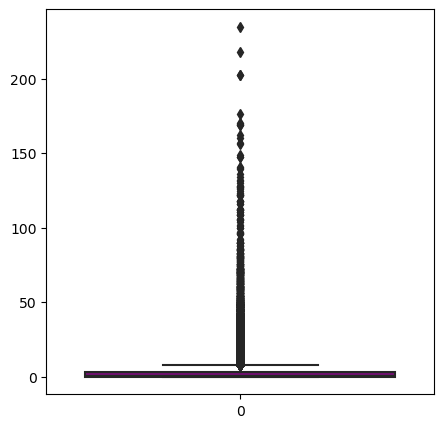

In [125]:
plt.figure(figsize=[5,5])
sns.boxplot(data['len'], color='purple')
plt.show()

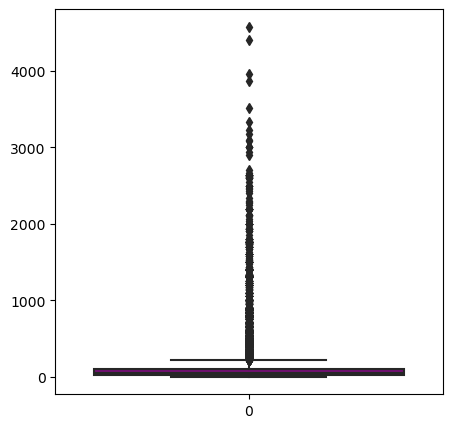

In [126]:
plt.figure(figsize=[5,5])
sns.boxplot(data['wid'], color='purple')
plt.show()

In [127]:
data['len'] = mstats.winsorize(data['inj'], limits=[0.05, 0.05])
data['wid'] = mstats.winsorize(data['fat'], limits=[0.05, 0.05])
data['inj'] = mstats.winsorize(data['len'], limits=[0.05, 0.05])
data['fat'] = mstats.winsorize(data['wid'], limits=[0.05, 0.05])

In [128]:
standardize = data[['mag', 'inj', 'fat', 'len', 'wid']]
other_data = data[['yr', 'mo', 'dy', 'date', 'st', 'state_encoded', 'slat', 'slon', 'elat', 'elon']]
s_data = standard_scaler.fit_transform(standardize)
s_data = pd.concat([pd.DataFrame(s_data, columns=standardize.columns), other_data], axis=1)
dtype_dict = {'yr': 'int32', 'mo': 'int32', 'dy': 'int32'}
s_data.head()

,mag,inj,fat,len,wid,yr,mo,dy,date,st,state_encoded,slat,slon,elat,elon
0,2.485345,3.630012,0.0,3.630012,0.0,1950,1,3,1950-01-03,IL,14,39.10,-89.30,39.12,-89.23
1,2.485345,3.630012,0.0,3.630012,0.0,1950,1,3,1950-01-03,MO,24,38.77,-90.22,38.83,-90.03
2,0.254465,0.990536,0.0,0.990536,0.0,1950,1,3,1950-01-03,OH,35,40.88,-84.58,0.00,0.00
3,2.485345,0.990536,0.0,0.990536,0.0,1950,1,13,1950-01-13,AR,2,34.40,-94.37,0.00,0.00
4,1.369905,-0.329202,0.0,-0.329202,0.0,1950,1,25,1950-01-25,IL,14,41.17,-87.33,0.00,0.00


In [129]:
print(s_data.isnull().sum())
s_data = s_data.dropna()
print(s_data.isnull().sum())

mag              0
inj              0
fat              0
len              0
wid              0
yr               0
mo               0
dy               0
date             0
st               0
state_encoded    0
slat             0
slon             0
elat             0
elon             0
dtype: int64
mag              0
inj              0
fat              0
len              0
wid              0
yr               0
mo               0
dy               0
date             0
st               0
state_encoded    0
slat             0
slon             0
elat             0
elon             0
dtype: int64


In [130]:
s_data['yr'] = s_data['yr'].astype('int')
s_data['mo'] = s_data['mo'].astype('int')
s_data['dy'] = s_data['dy'].astype('int')
s_data.dtypes

mag              float64
inj              float64
fat              float64
len              float64
wid              float64
yr                 int32
mo                 int32
dy                 int32
date              object
st                object
state_encoded      int32
slat             float64
slon             float64
elat             float64
elon             float64
dtype: object

In [131]:
column_names = {'mag': 'Magnitude',
                'inj': 'Injuries',
                'fat': 'Deaths',
                'st': 'State',
                'len': 'Length',
                'wid': 'Width'}
data.rename(columns=column_names, inplace=True)
s_data.rename(columns=column_names, inplace=True)

In [133]:
data.head(10)

,yr,mo,dy,date,State,Magnitude,Injuries,Deaths,slat,slon,elat,elon,Length,Width,state_encoded
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3,0,14
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,3,0,24
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,1,0,35
3,1950,1,13,1950-01-13,AR,3,1,0,34.40,-94.37,0.00,0.00,1,0,2
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0,0,14
5,1950,1,25,1950-01-25,MO,2,3,0,37.60,-90.68,37.63,-90.65,3,0,24
6,1950,1,26,1950-01-26,TX,2,2,0,26.88,-98.12,26.88,-98.05,2,0,44
7,1950,2,11,1950-02-11,TX,2,0,0,29.42,-95.25,29.52,-95.13,0,0,44
8,1950,2,11,1950-02-11,TX,2,3,0,32.35,-95.20,32.42,-95.20,3,0,44
9,1950,2,11,1950-02-11,TX,2,3,0,32.98,-94.63,33.00,-94.70,3,0,44


In [142]:
##dataset 2
weather_data = pd.read_parquet('daily_weather.parquet')
weather_data.head()

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,41515,Asadabad,1957-07-01,Summer,27.0,21.1,35.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,41515,Asadabad,1957-07-02,Summer,22.8,18.9,32.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,41515,Asadabad,1957-07-03,Summer,24.3,16.7,35.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,41515,Asadabad,1957-07-04,Summer,26.6,16.1,37.8,4.1,NaN,NaN,NaN,NaN,NaN,NaN
4,41515,Asadabad,1957-07-05,Summer,30.8,20.0,41.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
city_data = pd.read_csv('weather_cities.csv')
city_data.head()

,station_id,city_name,country,state,iso2,iso3,latitude,longitude
0,41515,Asadabad,Afghanistan,Kunar,AF,AFG,34.866000,71.150005
1,38954,Fayzabad,Afghanistan,Badakhshan,AF,AFG,37.129761,70.579247
2,41560,Jalalabad,Afghanistan,Nangarhar,AF,AFG,34.441527,70.436103
3,38947,Kunduz,Afghanistan,Kunduz,AF,AFG,36.727951,68.872530
4,38987,Qala i Naw,Afghanistan,Badghis,AF,AFG,34.983000,63.133300


In [149]:
weather_data = pd.merge(weather_data, city_data, on='station_id', how='left')
weather_data.head()

,station_id,city_name_x,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,...,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min,city_name_y,country,state,iso2,iso3,latitude,longitude
0,41515,Asadabad,1957-07-01,Summer,27.0,21.1,35.6,0.0,NaN,NaN,...,NaN,NaN,NaN,Asadabad,Afghanistan,Kunar,AF,AFG,34.866,71.150005
1,41515,Asadabad,1957-07-02,Summer,22.8,18.9,32.2,0.0,NaN,NaN,...,NaN,NaN,NaN,Asadabad,Afghanistan,Kunar,AF,AFG,34.866,71.150005
2,41515,Asadabad,1957-07-03,Summer,24.3,16.7,35.6,1.0,NaN,NaN,...,NaN,NaN,NaN,Asadabad,Afghanistan,Kunar,AF,AFG,34.866,71.150005
3,41515,Asadabad,1957-07-04,Summer,26.6,16.1,37.8,4.1,NaN,NaN,...,NaN,NaN,NaN,Asadabad,Afghanistan,Kunar,AF,AFG,34.866,71.150005
4,41515,Asadabad,1957-07-05,Summer,30.8,20.0,41.7,0.0,NaN,NaN,...,NaN,NaN,NaN,Asadabad,Afghanistan,Kunar,AF,AFG,34.866,71.150005


In [151]:
us_count = weather_data['country'].value_counts().get('United States of America', 0)
print(us_count)

1481287


In [152]:
weather_data = weather_data[weather_data['country'] == 'United States of America']
weather_data.head()

,station_id,city_name_x,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,...,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min,city_name_y,country,state,iso2,iso3,latitude,longitude
25761028,72518,Albany,1938-06-01,Summer,NaN,8.3,26.7,0.0,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,New York,US,USA,42.670017,-73.819949
25761029,72518,Albany,1938-06-02,Summer,NaN,9.4,26.1,5.1,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,New York,US,USA,42.670017,-73.819949
25761030,72518,Albany,1938-06-03,Summer,NaN,13.9,23.3,4.1,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,New York,US,USA,42.670017,-73.819949
25761031,72518,Albany,1938-06-04,Summer,NaN,9.4,25.0,0.0,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,New York,US,USA,42.670017,-73.819949
25761032,72518,Albany,1938-06-05,Summer,NaN,13.3,22.2,0.0,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,New York,US,USA,42.670017,-73.819949


## Data Exploration
---

### Have tornados increased or decreased over the years?

Text(0, 0.5, 'Count')

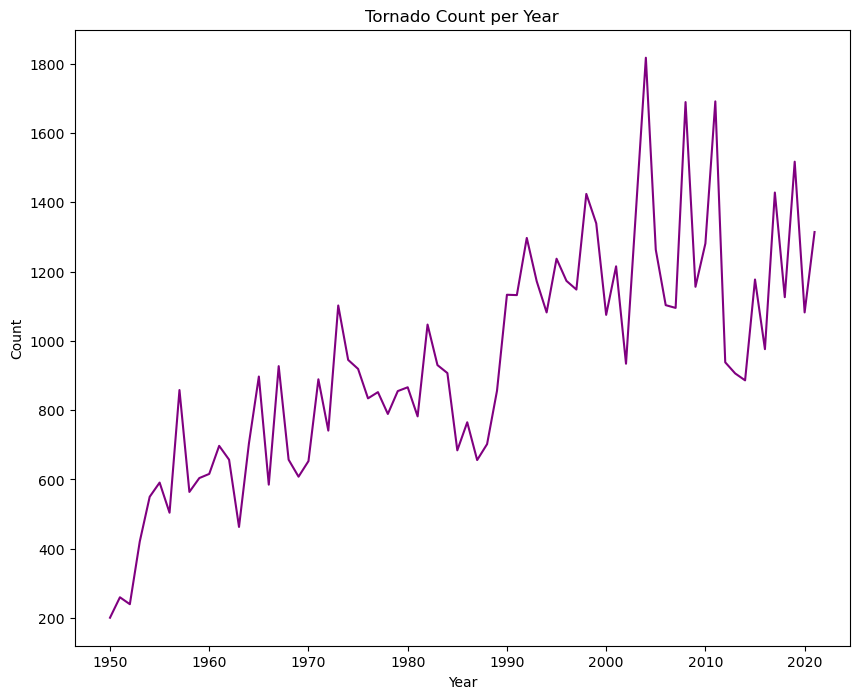

In [141]:
plt.figure(figsize=[10,8])
plt.plot(data.groupby('yr').Magnitude.count(), color="purple")
plt.title('Tornado Count per Year')
plt.xlabel('Year')
plt.ylabel('Count')